 # Who are the Bossy Words?

 On this activity you will use TF-IDF to find the most relevant words on news articles that talk about money in the [Reuters Corpus](https://www.nltk.org/book/ch02.html#reuters-corpus) bundled in `NLTK`. Once you find the most relevant words, you should create a word cloud.

In [1]:
# initial imports
import nltk
from nltk.corpus import reuters
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

plt.style.use("seaborn-whitegrid")
mpl.rcParams["figure.figsize"] = [20.0, 10.0]


 ## Loading the Reuters Corpus

 The first step is to load the Reuters Corpus.

In [2]:
# Download/update the Reuters dataset
nltk.download("reuters")


[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\tbrod\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

 ## Getting the News About Money

 You will analyze only news that talk about _money_. There are two categories on the Reuters Corpus that talk about money: `money-fx` and `money-supply`. In this section, you will filter the news by these categories.

 Take a look into the [Reuters Corpus documentation](https://www.nltk.org/book/ch02.html#reuters-corpus) and check how you can retrieve the categories of a document using the `reuters.categories()` method; write some lines of code to retrieve all the news articles that are under the `money-fx` or the `money-supply` categories.

 **Hint:**
 You can use a comprehension list or a for-loop to accomplish this task.

In [4]:
# Getting all documents ids under the money-fx and money-supply categories
categories = ["money-fx", "money-supply"]
all_docs_id = reuters.fileids()
money_news_ids = [
    doc
    for doc in all_docs_id
    if categories[0] in reuters.categories(doc)
    or categories[1] in reuters.categories(doc)
]

print(f"Total articles about $: {len(money_news_ids)}")


Total articles about $: 883


In [5]:
# Creating the working corpus containing the text from all the news articles about money
money_news = [reuters.raw(doc).lower() for doc in money_news_ids]
# Printing a sample article
print(money_news[50])

treasury's baker says system needs stability
  treasury secretary james baker said
  the floating exchange rate system has not been as effective as
  had been hoped in promoting stability and preventing imbalances
  from emerging in the global economy.
      in remarks before the afternoon session of the
  international monetary fund's interim committee, baker said he
  was not suggesting that the system should be abandoned.
      "but i do suggest," he said, "that we need something to give
  it more stability and to keep it headed in the right direction
  when the wind shifts."
      he said that indicators can serve "as a kind of compass" but
  added that structural indicators can help focus attention on
  some policies.
      baker, however, said the imf "needs to move beyond
  macroeconomic indicators and find structural indicators that
  can help focus attention on some of the policies of specific
  relevance to the imbalances we face today."
      the treasury secretary said that

 ## Calculating the TF-IDF Weights

 Calculate the TF-IDF weight for each word on the working corpus using the `TfidfVectorizer()` class. Remember to include the `stop_words='english'` parameter.

In [6]:
# Calculating TF-IDF for the working corpus.
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(money_news)


 Create a DataFrame representation of the TF-IDF weights of each term in the working corpus. Use the `sum(axis=0)` method to calculate a measure similar to the term frequency based on the TF-IDF weight, this value will be used to rank the terms for the word cloud creation.

In [7]:
# Creating a DataFrame Representation of the TF-IDF results
money_news_df = pd.DataFrame(
    list(zip(vectorizer.get_feature_names(), np.ravel(X.sum(axis=0)))), columns=["Word", "Frequency"])
# Order the DataFrame by word frequency in descending order
money_news_df = money_news_df.sort_values(by=["Frequency"], ascending=False)
# Print the top 10 words
money_news_df.head(10)


,Word,Frequency
5876,said,54.918051
4424,mln,51.533825
1252,bank,49.568996
6397,stg,47.236863
1353,billion,43.544274
4880,pct,41.917193
2461,dollar,37.178790
2939,fed,36.860352
2452,dlrs,36.273205
4265,market,35.086673


 ## Retrieving the Top Words

 In order to create the word cloud you should get the top words, in this case we will use a thumb rule that has been empirically tested by some NLP experts that states that words with a frequency between 10 and 30 might be the most relevant in a corpus.

 Following this rule, create a new DataFrame containing only those words with the mentioned frequency.

In [8]:
# Top words will be those with a frequency between 10 ans 30 (thumb rule)
top_words = money_news_df[(money_news_df["Frequency"] >= 10) & (money_news_df["Frequency"] <= 30)]

top_words.head(10)


,Word,Frequency
7324,yen,28.343276
5913,says,26.248262
3844,japan,23.927655
2783,exchange,22.504089
2158,dealers,22.503656
5365,rate,21.277388
7203,week,20.247803
5366,rates,19.969733
1620,central,18.079040
2105,currency,17.370210


 ## Creating Word Cloud

 Now you have all the pieces needed to create a word cloud based on TF-IDF weights, so use the `WordCloud` library to create it.

(-0.5, 399.5, 199.5, -0.5)

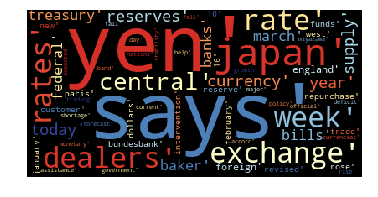

In [9]:
# Create a string list of terms to generate the word cloud
terms_list = str(top_words["Word"].tolist())

# Create the word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(terms_list)
plt.imshow(wordcloud)
plt.axis("off")


 ## Challenge: Looking for Documents that Contains Top Words

 Finally you might find interesting to search those articles that contain the most relevant words. Create a function called `retrieve_docs(terms)` that receive a list of terms as parameter and extract from the working corpus all those news articles that contains the search terms. On this function you should use the `reuters.words()` method to retrieve the tokenized version of each article as can be seen on the [Reuters Corpus documentation](https://www.nltk.org/book/ch02.html#reuters-corpus).

 **Hint:** To find any occurrence of the search terms you might find quite useful [this post on StackOverflow](https://stackoverflow.com/a/25102099/4325668), also you should lower case all the words to ease your terms search.

In [20]:
def retrieve_docs(terms):
    result_docs = []
    for doc_id in money_news_ids:
        found_terms = [
        word
        for word in reuters.words(doc_id)
        if any(term in word.lower() for term in terms)
    ]
        if len(found_terms) > 0:
            result_docs.append(doc_id)
    return result_docs

 ### Question 1: How many articles talk about Yen?

In [21]:
len(retrieve_docs(["yen"]))


182

### Question 2: How many articles talk about Japan or Banks?

In [22]:
len(retrieve_docs(["japan", "banks"]))


326

 ### Question 3: How many articles talk about England or Dealers?

In [23]:
len(retrieve_docs(["england", "dealers"]))


299